## EDA Notebook ##

Schoeggl_Vorauer 2020

In [174]:
# Start by importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Function_Definitions import *
import seaborn as sns
import folium

In [13]:
# Loading the clean DataFrames 
m6 = datetime(pd.read_csv(r'..\Data\Clean\carchive_M6.csv')) # Modis archive data
nrtm6  = datetime(pd.read_csv(r'..\Data\Clean\cnrt_M6.csv')) # Modis Data near realtime
v1 = datetime(pd.read_csv(r'..\Data\Clean\carchive_V1.csv')) # Viirs archive data
nrtv1     = datetime(pd.read_csv(r'..\Data\Clean\cnrt_V1.csv')) # Viirs Data near realtime
#rain      = datetime(pd.read_csv(r'..\Data\Clean\rain.csv'))
#wind      = datetime(pd.read_csv(r'..\Data\Clean\wind.csv'))
weather   = datetime(pd.read_csv(r'..\Data\Clean\cweather.csv'))

In [14]:
# Restricting the m6 archive date to the time interval of the v1 archive data
am6 = m6[(m6.acq_date>=v1.acq_date.min()) & (m6.acq_date <= v1.acq_date.max())]

In [16]:
# Looking at the behaviour of the brightness columns and the frp over the years
m6cols = ['frp','brightness','bright_t31']
am6_y = timeselect(am6, freq='M', columns=m6cols)
v1cols = ['frp','bright_ti4','bright_ti5']
av1_y = timeselect(v1, freq='M', columns=v1cols)

## Question 1: Which year|month|state had the highest values for brightness (all sensors) and frp (released energy)? ##

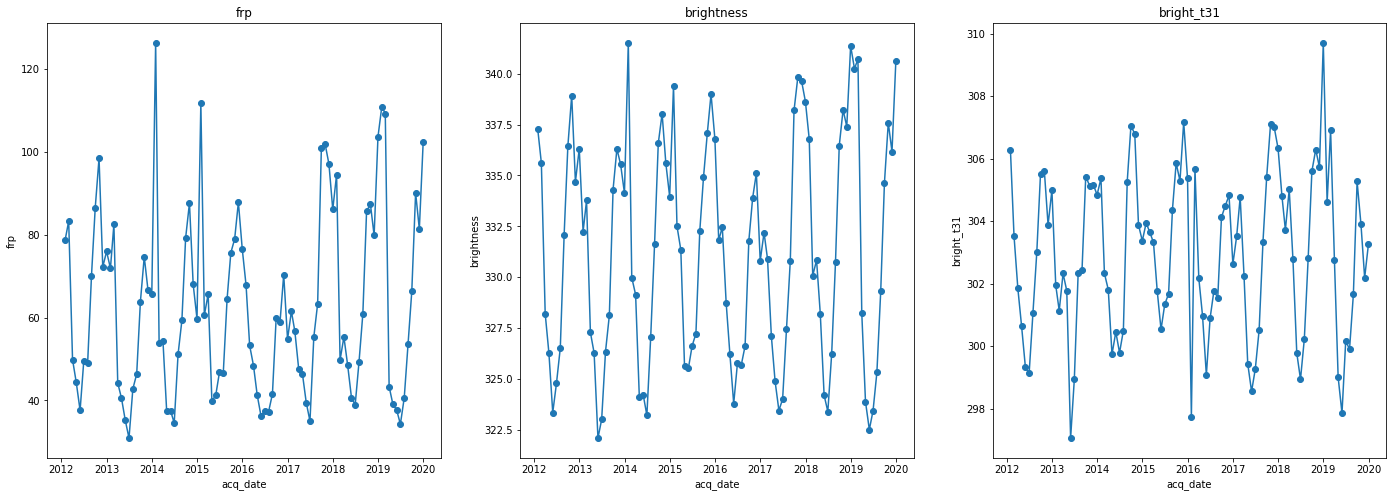

In [17]:
# Plotting the development of the selected columns
fig, ax = plt.subplots(1,3, figsize = (24,8))
for i,j in enumerate(m6cols):
    ax[i].plot(am6_y.set_index('acq_date')[j], '-o')
    ax[i].set_title(j)
    ax[i].set_ylabel(j)
    ax[i].set_xlabel('acq_date')


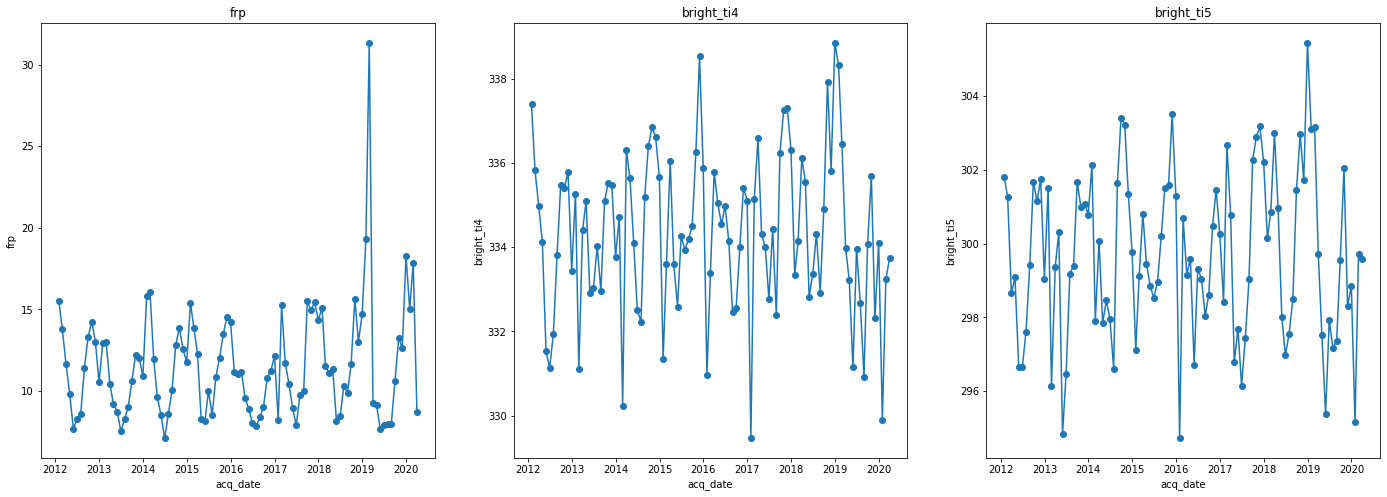

In [19]:
fig, ax = plt.subplots(1,3, figsize = (24,8))
for i,j in enumerate(v1cols):
    ax[i].plot(av1_y.set_index('acq_date')[j], '-o')
    ax[i].set_title(j)
    ax[i].set_ylabel(j)
    ax[i].set_xlabel('acq_date')

We can see that 2019 was the year with the most released engery (frp) as well as the most brightness values for all sensors (i.e. an increase in fire incidents).

However, from the modis 6 data (top plots) we only have values until march but it already has a higher peak for frp and brightness than 2019.

In [21]:
# Let's take a closer look into 2019 and group the date by the 6 different States
am6_2019 = [am6[(am6.Year == 2019) & (am6.State == i)] for i in am6.State.unique()]
av1_2019 = [v1[(v1.Year==2019) & (v1.State == i)] for i in v1.State.unique()]

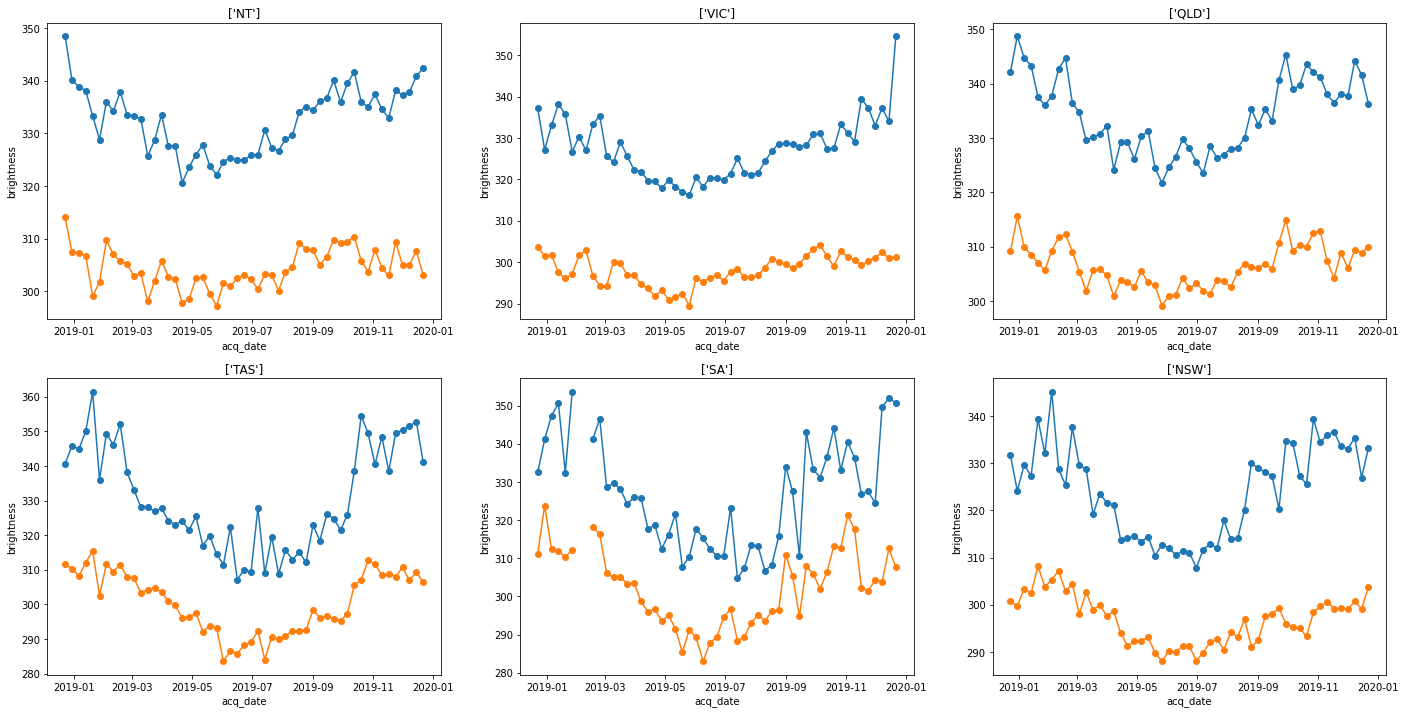

In [22]:
# Here we plot the brightness with a weekly mean frequency for each State
prop1 = 'brightness'
prop2 = 'bright_t31'
fig, ax = plt.subplots(2,3, figsize = (24,12))
a = ax.ravel()
for i,j in enumerate(am6_2019):
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop1].mean(), '-o')
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop2].mean(), '-o')
    a[i].set_title(j.State.unique())
    a[i].set_ylabel('brightness')
    a[i].set_xlabel('acq_date')
    #a[i].legend(m6cols)

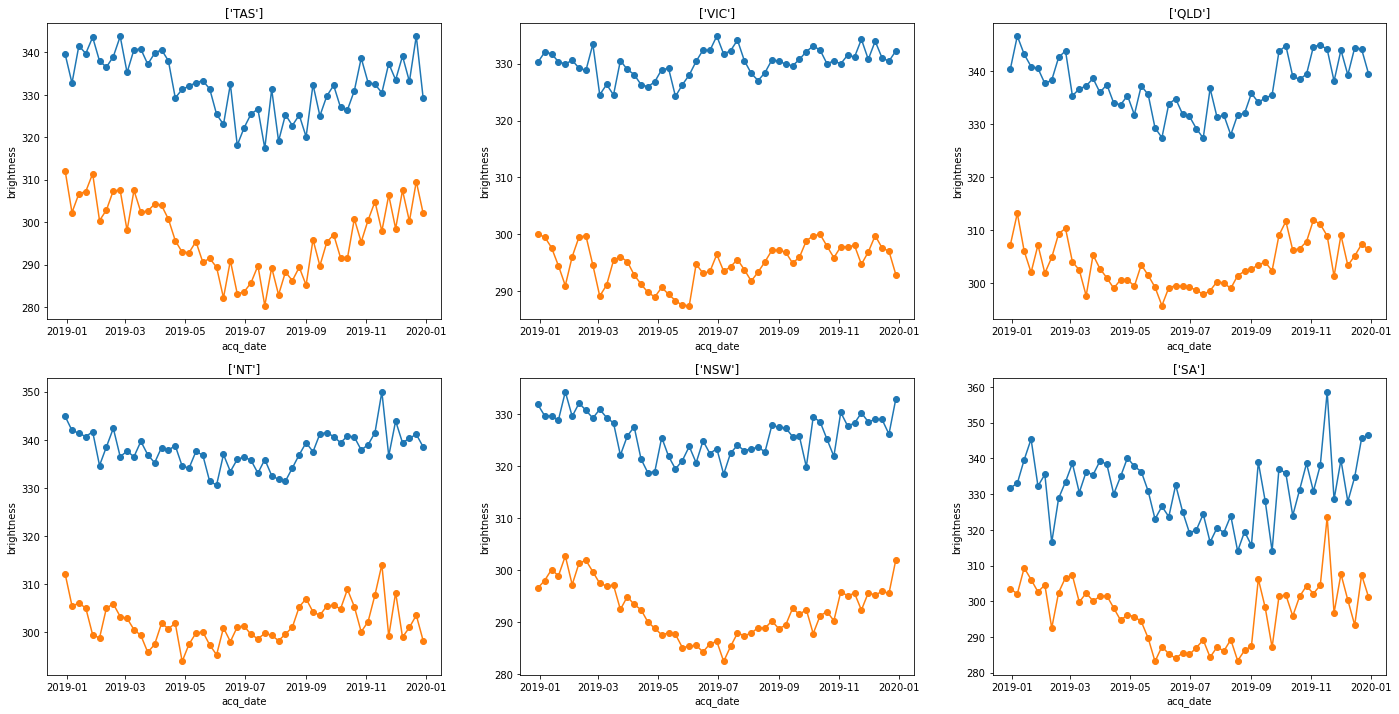

In [23]:
prop1 = 'bright_ti4'
prop2 = 'bright_ti5'
fig, ax = plt.subplots(2,3, figsize = (24,12))
a = ax.ravel()
for i,j in enumerate(av1_2019):
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop1].mean(), '-o')
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop2].mean(), '-o')
    a[i].set_title(j.State.unique())
    a[i].set_ylabel('brightness')
    a[i].set_xlabel('acq_date')
    #a[i].legend(m6cols)

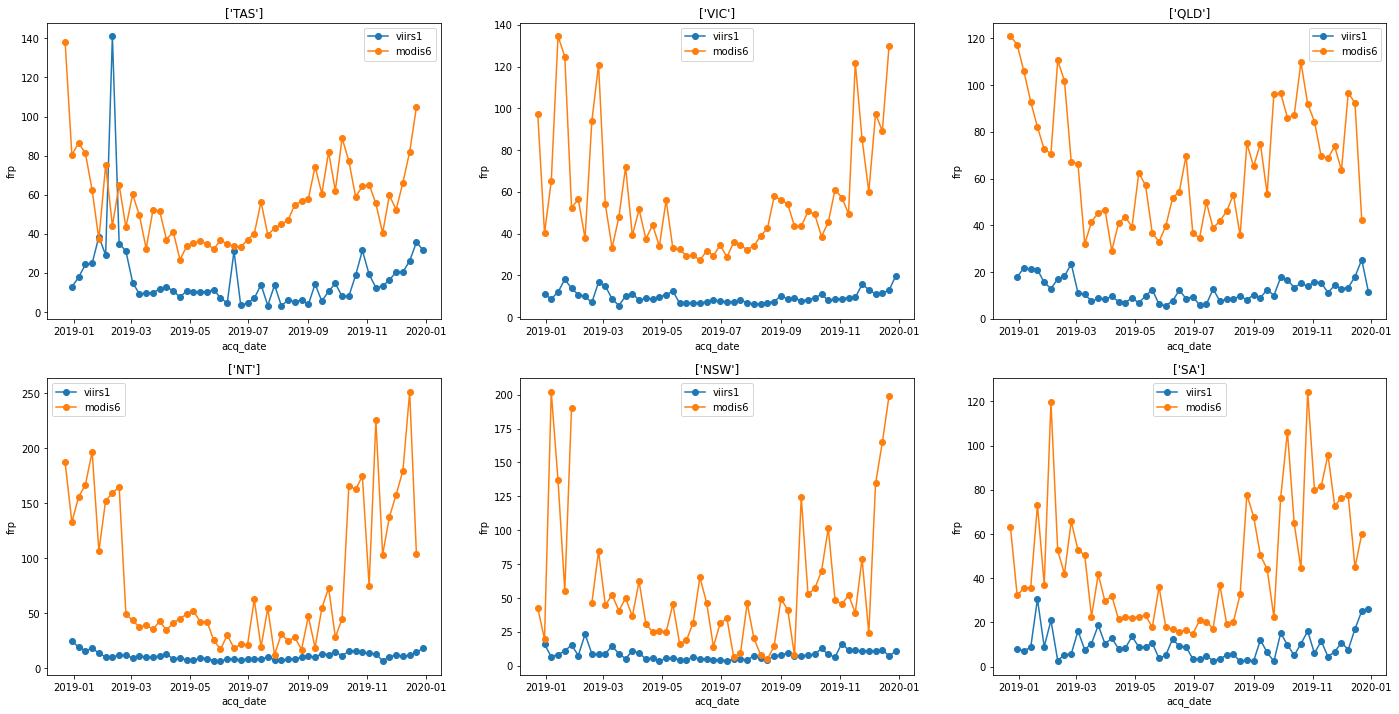

In [24]:
prop1 = 'frp'
fig, ax = plt.subplots(2,3, figsize = (24,12))
a = ax.ravel()
for i,j in enumerate(av1_2019):
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop1].mean(), '-o', label = 'viirs1')
    a[i].plot(am6_2019[i].groupby([pd.Grouper(key='acq_date', freq='W')])[prop1].mean(), '-o', label = 'modis6')
    a[i].set_title(j.State.unique())
    a[i].set_ylabel('frp')
    a[i].set_xlabel('acq_date')
    a[i].legend()

We can see, that in general for the spring/summer months in the beginning and end of the year, the values for the brightness sensor are the hightest and in the autumn/winter months the values are the lowest, except for the state Victoria in the south east where the viirs satellite has a peak in the winter months. This might be due to the sensitivity cap on the on board sensors.
As for the the states with the brightest fires, Victoria is on average the lowest together with NSW. South Australia and NA had the highest brightness on average in 2019. The same months for the released energy measured (frp) as for the brightness values show the highest values. However, here we see that Queensland and South Australia had the lowest values and NT and NSW the highest on average in 2019.

## Question 2: Which year|month|state had the highest values for TempMax and lowest for TempMin? ##

In [25]:
weather.keys()

Index(['acq_date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'latitude', 'longitude', 'Year',
       'Month', 'State', 'season'],
      dtype='object')

In [26]:
# Looking at the behaviour of the brightness columns and the frp over the years
weathercols = ['MinTemp','MaxTemp','Rainfall']
weather_y = timeselect(weather, freq='M', columns=weathercols)

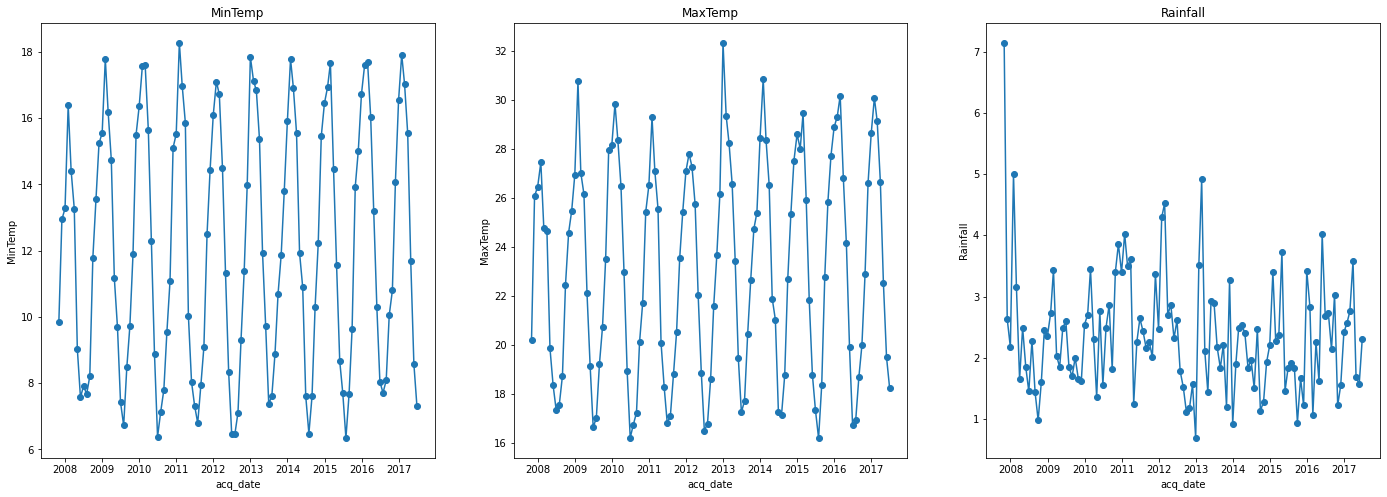

In [27]:
# Plotting the development of the selected columns
fig, ax = plt.subplots(1,3, figsize = (24,8))
for i,j in enumerate(weathercols):
    ax[i].plot(weather_y.set_index('acq_date')[j], '-o')
    ax[i].set_title(j)
    ax[i].set_ylabel(j)
    ax[i].set_xlabel('acq_date')

Here we don't see any year that stands out except for the rainfall in 2008. We will choose the year 2016 as this is the last complete year for this dataset

In [28]:
# Let's take a closer look into 2019 and group the date by the 6 different States
weather_2016 = [weather[(weather.Year == 2016) & (weather.State == i)] for i in weather.State.unique()]

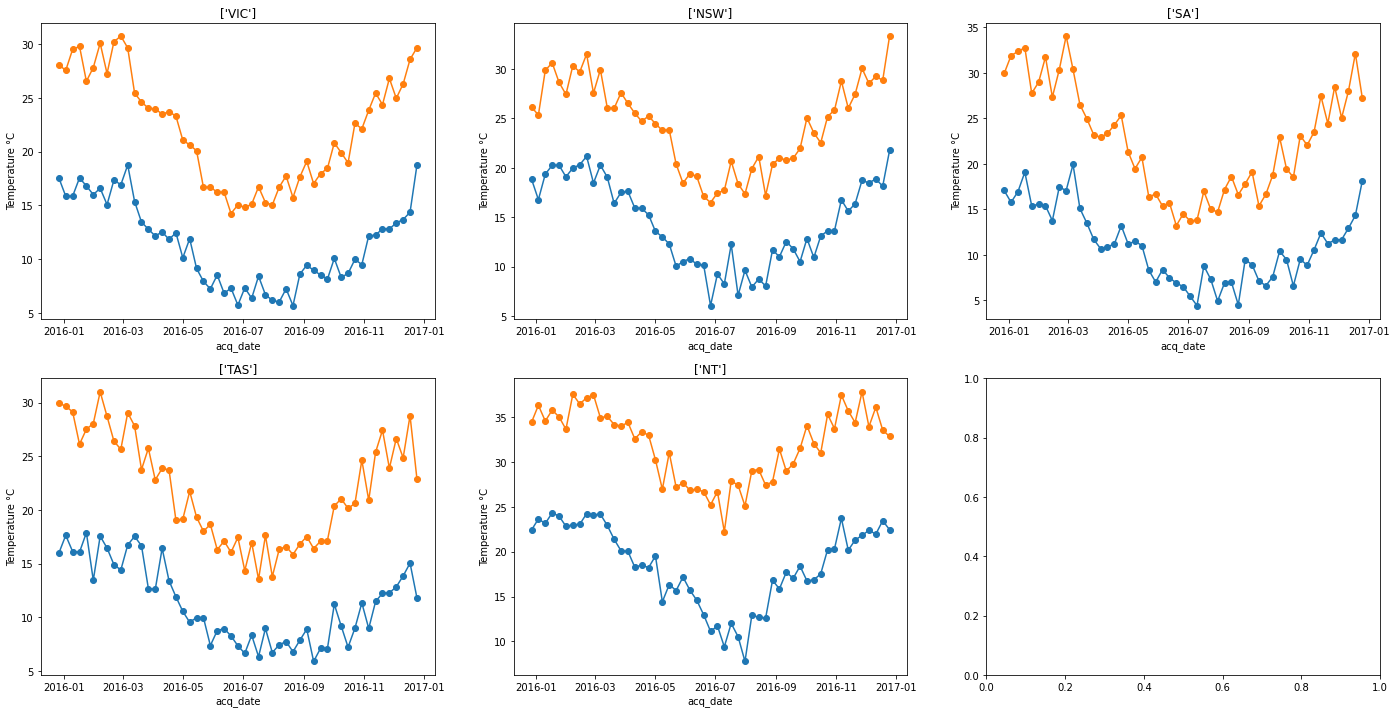

In [29]:
# Here we plot the brightness with a weekly mean frequency for each State
prop1 = 'MinTemp'
prop2 = 'MaxTemp'
fig, ax = plt.subplots(2,3, figsize = (24,12))
a = ax.ravel()
for i,j in enumerate(weather_2016):
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop1].mean(), '-o')
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop2].mean(), '-o')
    a[i].set_title(j.State.unique())
    a[i].set_ylabel('Temperature °C')
    a[i].set_xlabel('acq_date')
    #a[i].legend(m6cols)

We can see here clearly that the same trend as with the brightness is also visible here. The highest values are again in the warmer months.

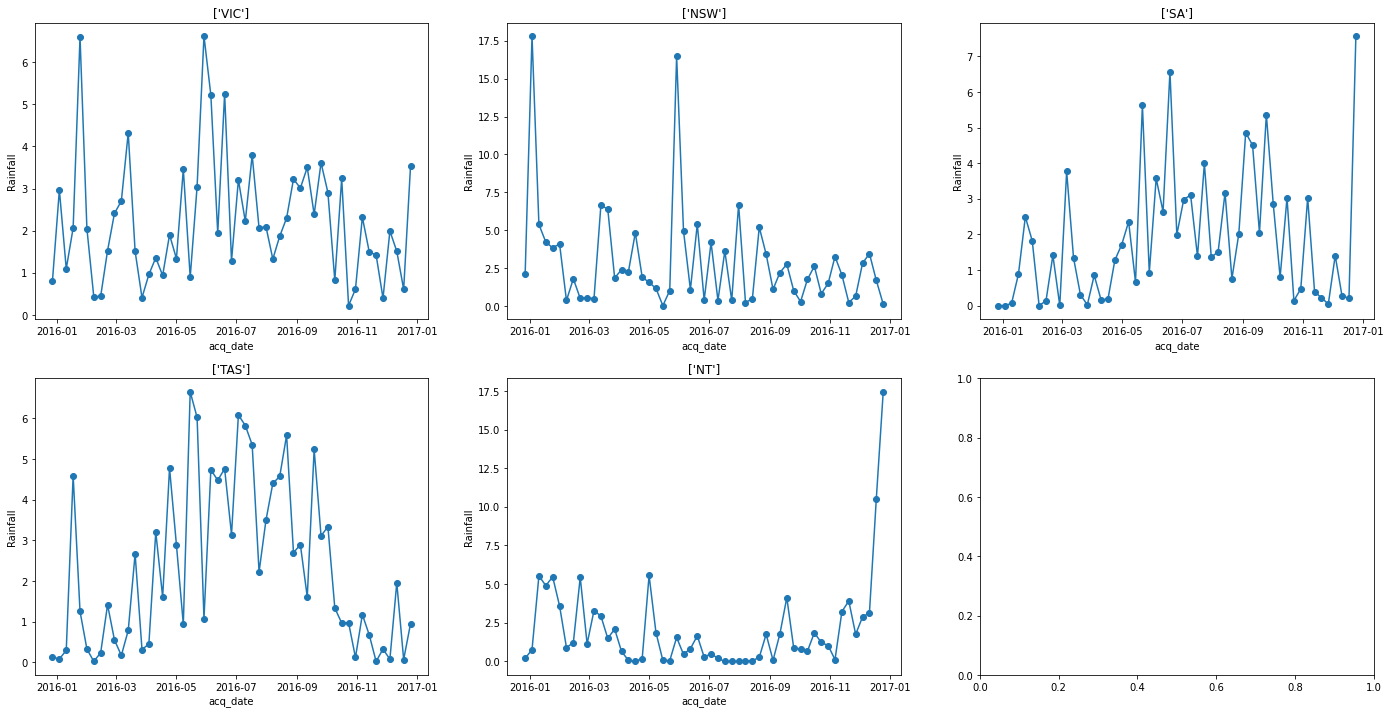

In [30]:
prop1 = 'Rainfall'
fig, ax = plt.subplots(2,3, figsize = (24,12))
a = ax.ravel()
for i,j in enumerate(weather_2016):
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop1].mean(), '-o')
    a[i].set_title(j.State.unique())
    a[i].set_ylabel('Rainfall')
    a[i].set_xlabel('acq_date')

The rainfall data seem pretty random, maybe a bit more rain falls down in the colder months.

In [31]:
#weather_2016[0].State.unique()
#am6_2019[1].State.unique()
av1_2019[1].State.unique()

array(['VIC'], dtype=object)

In [32]:
bla1 = weather_2016[0].groupby([pd.Grouper(key='acq_date', freq='W')])['MaxTemp'].mean()/weather_2016[0].MaxTemp.max()
bla2 = am6_2019[1].groupby([pd.Grouper(key='acq_date', freq='W')])['brightness'].mean()/am6_2019[1].brightness.max()
bla3 = av1_2019[1].groupby([pd.Grouper(key='acq_date', freq='W')])['bright_ti5'].mean()/av1_2019[1].bright_ti5.max()

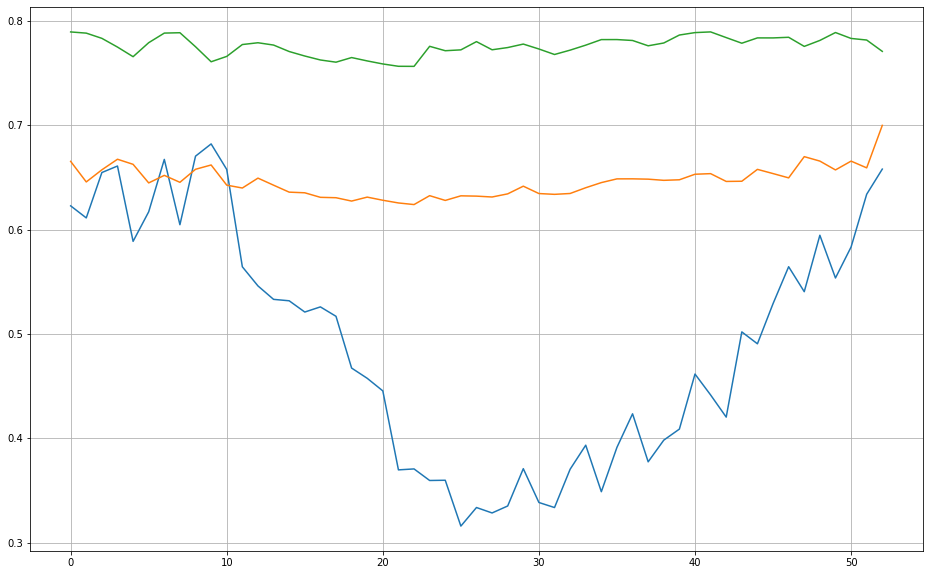

In [33]:
plt.figure(figsize = (16,10))
plt.plot(range(len(bla1)), bla1.values)
plt.plot(range(len(bla1)), bla2.values, bla3.values)
plt.grid()

## Question 3: Is there a correlation between the data ##

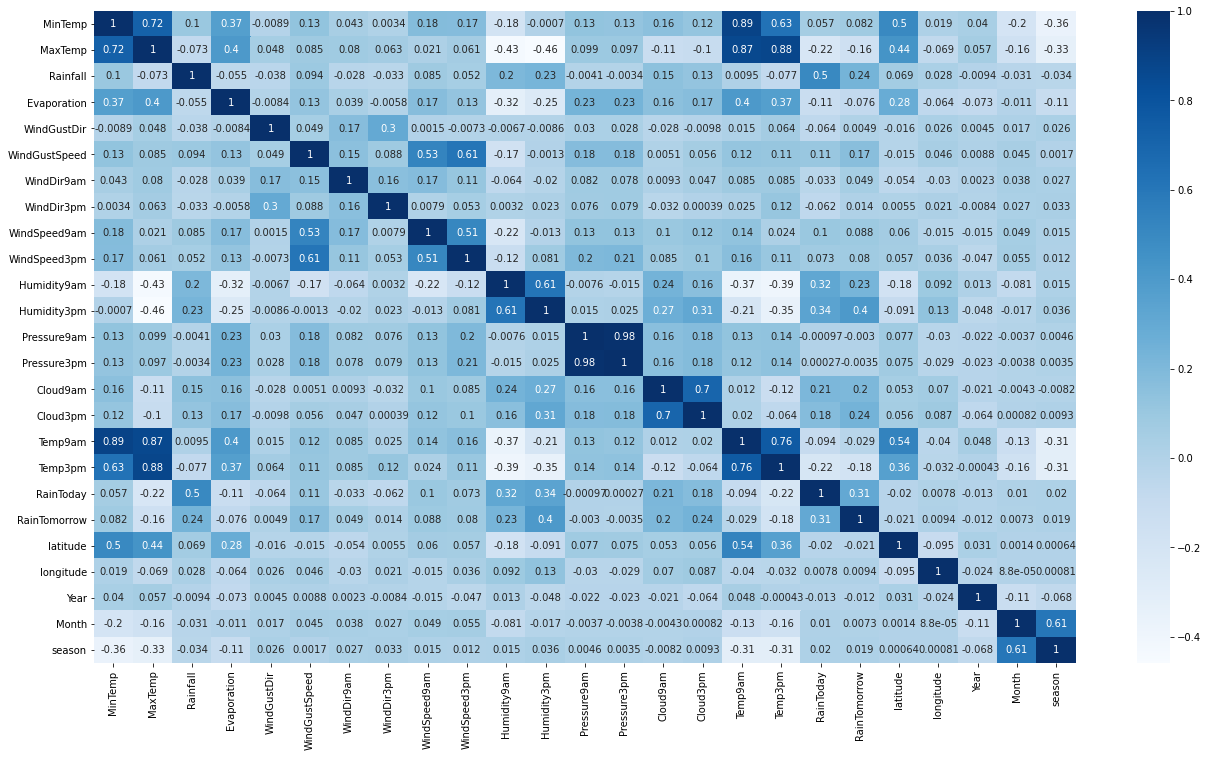

In [34]:
pearsoncor(weather, cmap=plt.cm.Blues)

Best corralation is as expected all the Temperature Columns correlate with each other.

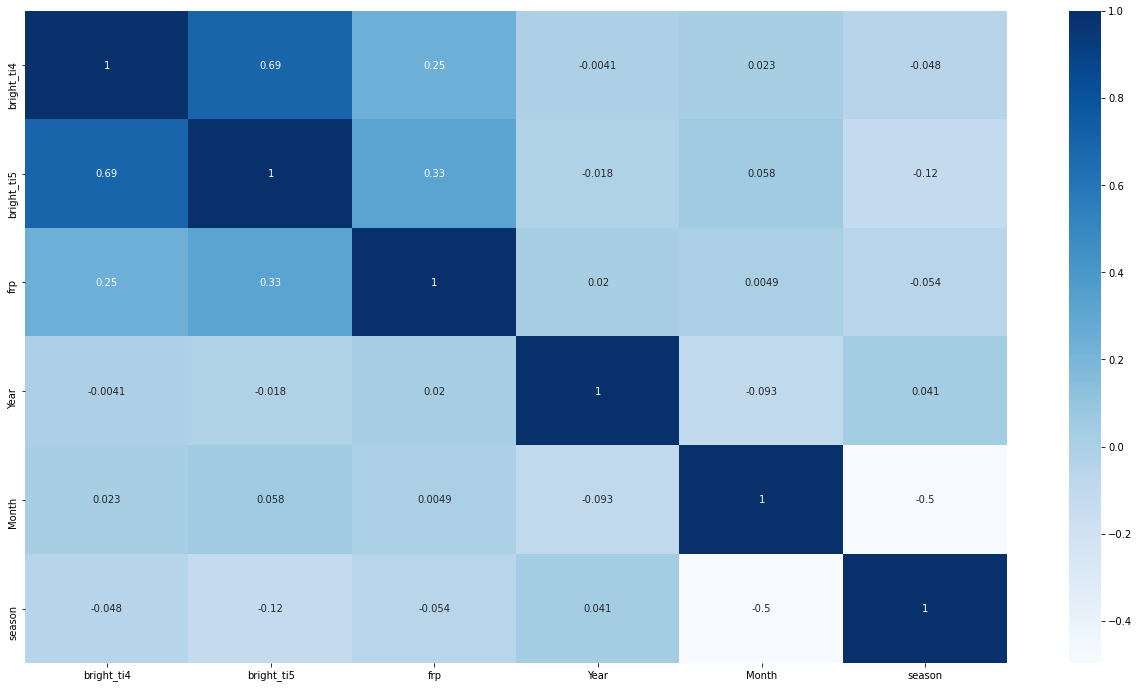

In [35]:
pearsoncor(v1[['bright_ti4', 'bright_ti5', 'frp','confidence', 'Year', 'Month', 'season']], cmap=plt.cm.Blues)

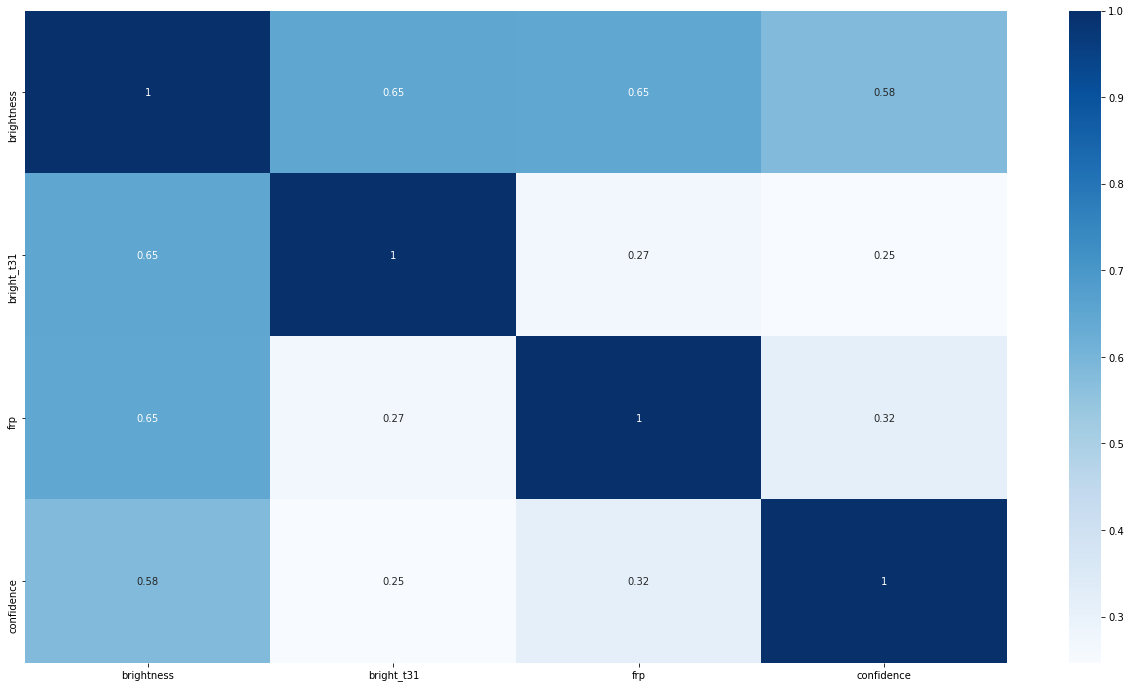

In [36]:
pearsoncor(m6[['brightness', 'bright_t31', 'frp','confidence']] , cmap=plt.cm.Blues)

In [43]:
sel_m6 = timeselect(m6, freq = 'M', fct = 'mean', columns = ['frp','brightness', 'bright_t31'])
sel_weat = timeselect(weather, freq = 'M', fct = 'mean', columns = ['Pressure3pm','MaxTemp', 'MinTemp'])

In [44]:
c = sel_m6[(sel_m6.acq_date >= sel_weat.acq_date.min()) & (sel_m6.acq_date <= sel_weat.acq_date.max())]

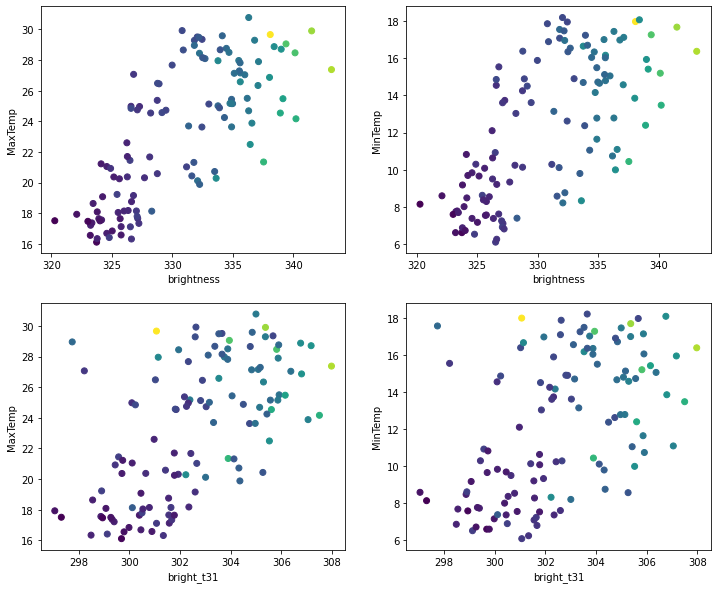

In [46]:
#Modis
fig, ax = plt.subplots(2,2, figsize=(12,10))

g =['brightness', 'bright_t31']
h =['MaxTemp', 'MinTemp']
for i in range(2):
    for j in range(2):
        ax[i,j].scatter(x=c[g[i]], y=sel_weat[h[j]], c=c.frp)
        ax[i,j].set_xlabel(g[i])
        ax[i,j].set_ylabel(h[j])



In [51]:
sel_v1 = timeselect(v1, freq = 'M', fct = 'mean', columns = ['frp','bright_ti4', 'bright_ti5'])

In [57]:
c2 = sel_v1[(sel_v1.acq_date <= sel_weat.acq_date.max())]
c3 = sel_weat[sel_weat.acq_date >= sel_v1.acq_date.min()]


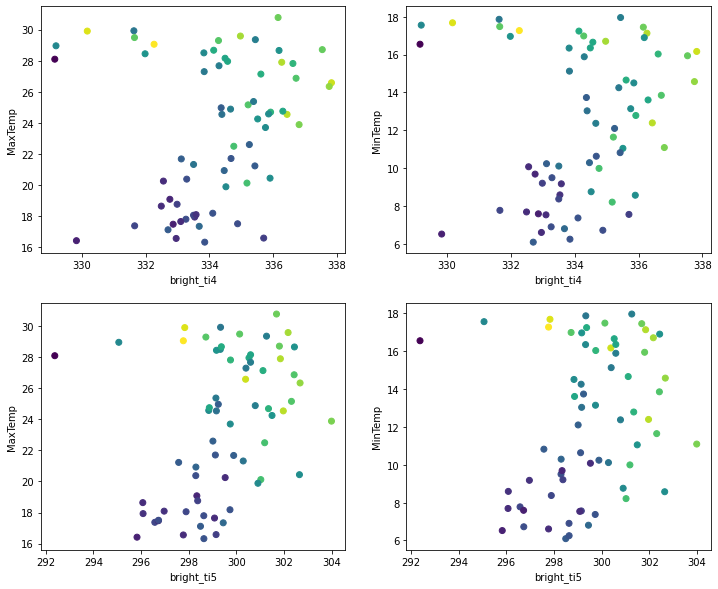

In [58]:
#Viirs
fig, ax = plt.subplots(2,2, figsize=(12,10))

k =['bright_ti4', 'bright_ti5']
l =['MaxTemp', 'MinTemp']
for i in range(2):
    for j in range(2):
        ax[i,j].scatter(x=c2[k[i]], y=c3[l[j]], c=c2.frp)
        ax[i,j].set_xlabel(k[i])
        ax[i,j].set_ylabel(l[j])


## Question 4: How differ the sensors of the satelite modis und virs sensors ##

In [92]:
#für M6
m6selS = m6.groupby([pd.Grouper(key='acq_date', freq='W-MON')])[['brightness', 'bright_t31', 'season']].mean().reset_index().sort_values('acq_date')
m6selS.season.fillna(1, inplace=True)
m6selS.season = m6selS.season.astype(int)


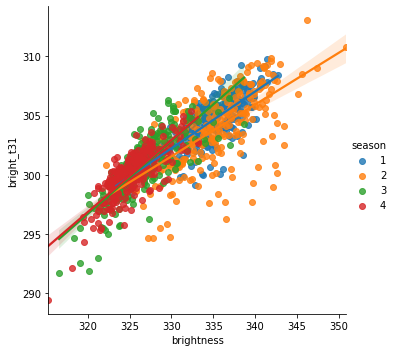

In [93]:
dfTSM6S = sns.lmplot(x='brightness', y='bright_t31', hue='season', data=m6selS)

In [85]:
m6.season.unique()

array([1, 2, 3, 4], dtype=int64)

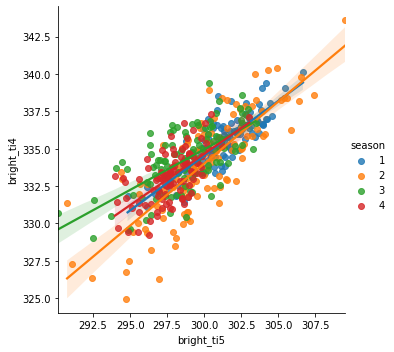

In [72]:
#für V1
v1sel = v1.groupby([pd.Grouper(key='acq_date', freq='W-MON')])[['bright_ti5', 'bright_ti4', 'season']].mean().reset_index().sort_values('acq_date')
v1sel.season = v1sel.season.astype(int)
dfTSV1 = sns.lmplot(x='bright_ti5', y='bright_ti4', hue='season', data=v1sel)

## Question 5: What ist the sensitivity maximum of the Modis Sensors ##

sensor sensitivity

D:\Dokumente\GitHub\AustralienFiresFromSpace_Schoeggl_Vorauer\Notebooks\Function_Definitions.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if fct == 'mean': out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].mean().reset_index().sort_values('acq_date')


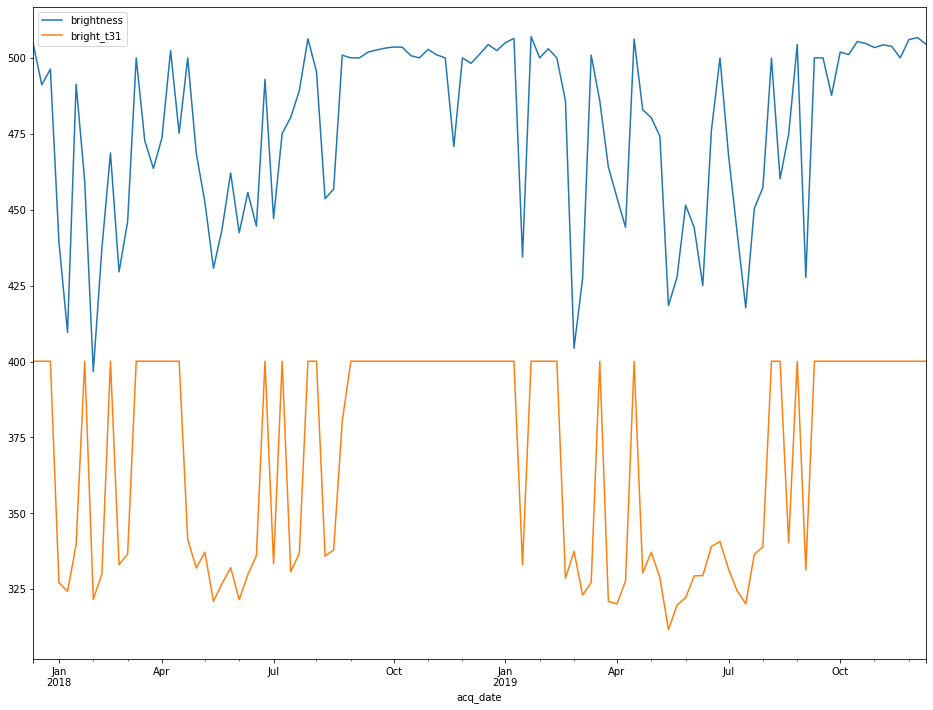

In [96]:
y_m6 = m6[m6.Year >= 2018]
ybb= timeselect(y_m6 , freq='W',fct='max', columns=['brightness', 'bright_t31'])
ybb.set_index('acq_date').plot(figsize=(16,12))

we can see in the plot that the bright_t31 Sensor of Modis can not messure more than a brightness of 400

dataset statistics

In [97]:
#weather dataset statistics
for column in weather.columns:
    print('Statistic for ', column)
    print(weather[column].describe())
    print('---------------------')

Statistic for  acq_date
count                  142193
unique                   3436
top       2013-12-22 00:00:00
freq                       49
first     2007-10-11 00:00:00
last      2017-06-04 00:00:00
Name: acq_date, dtype: object
---------------------
Statistic for  Location
count       142193
unique          49
top       Canberra
freq          3418
Name: Location, dtype: object
---------------------
Statistic for  MinTemp
count    142193.000000
mean         12.131807
std           6.440548
min          -8.500000
25%           7.500000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64
---------------------
Statistic for  MaxTemp
count    142193.000000
mean         23.174186
std           7.194768
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64
---------------------
Statistic for  Rainfall
count    142193.000000
mean          2.326738
std 

In [100]:
#Modis Archive Dataset satistics
for column in m6.columns:
    print('Statistic for ', column)
    print(m6[column].describe())
    print('---------------------')

Statistic for  latitude
count    5.081220e+06
mean    -2.060150e+01
std      6.899937e+00
min     -4.359600e+01
25%     -2.489190e+01
50%     -1.864910e+01
75%     -1.519350e+01
max     -9.246300e+00
Name: latitude, dtype: float64
---------------------
Statistic for  longitude
count    5.081220e+06
mean     1.347241e+02
std      9.492635e+00
min      1.130703e+02
25%      1.276544e+02
50%      1.331337e+02
75%      1.428711e+02
max      1.535919e+02
Name: longitude, dtype: float64
---------------------
Statistic for  brightness
count    5.081220e+06
mean     3.324822e+02
std      2.188411e+01
min      3.000000e+02
25%      3.181000e+02
50%      3.289000e+02
75%      3.413000e+02
max      5.070000e+02
Name: brightness, dtype: float64
---------------------
Statistic for  scan
count    5.081220e+06
mean     1.694326e+00
std      8.724069e-01
min      1.000000e+00
25%      1.100000e+00
50%      1.300000e+00
75%      2.000000e+00
max      4.800000e+00
Name: scan, dtype: float64
------------

## Question 6: are we able to predict confidance values for the Modis nrt data ##

### Machine Learning: ###
We are predicting confidence of the satelite sensors because its an important feature in fire observation.

What ist confidence:

* This value is based on a collection of intermediate algorithm quantities used in the detection process. It is intended to help users gauge the quality of individual hotspot/fire pixels. Confidence values are set to low, nominal and high. Low confidence daytime fire pixels are typically associated with areas of sun glint and lower relative temperature anomaly (<15K) in the mid-infrared channel I4. Nominal confidence pixels are those free of potential sun glint contamination during the day and marked by strong (>15K) temperature anomaly in either day or nighttime data. High confidence fire pixels are associated with day or nighttime saturated pixels.

* source: https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/viirs-i-band-active-fire-data

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [102]:
bm6 = m6[m6.Year > 2018]

In [103]:
bm6.shape

(310484, 13)

In [104]:
X = bm6.drop(['confidence','scan','track','acq_date', 'State'], 1)
y = bm6.confidence>=80

In [106]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Random Forest ###

In [107]:
rf = rfc(max_depth=2)

In [108]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2)

In [109]:
y_pred = rf.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.76      0.93      0.84     56346
        True       0.88      0.63      0.74     46114

    accuracy                           0.80    102460
   macro avg       0.82      0.78      0.79    102460
weighted avg       0.81      0.80      0.79    102460



Random Forest achives an overall accuracy for the f1 score of 80%

### Logistic Regression Model ###

In [111]:
lr = LogisticRegression()

In [115]:
lr.fit(X_train,y_train)

D:\PythonData\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [116]:
lr_pred = lr.predict(X_test)

In [117]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

       False       0.81      0.89      0.85     56346
        True       0.85      0.75      0.79     46114

    accuracy                           0.83    102460
   macro avg       0.83      0.82      0.82    102460
weighted avg       0.83      0.83      0.83    102460



Logistic Regression Model achives an overall accuracy for the f1 score of 83%

### LDA Model ###

In [122]:
lda = LDA(solver = 'lsqr')

In [123]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(solver='lsqr')

In [124]:
lda_pred = lda.predict(X_test)

In [125]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

       False       0.81      0.89      0.85     56346
        True       0.85      0.75      0.79     46114

    accuracy                           0.83    102460
   macro avg       0.83      0.82      0.82    102460
weighted avg       0.83      0.83      0.83    102460



LDA Model achives an overall accuracy for the f1 score of 83%

We are able to predict the confidence with overall 83 percent accuracy.

## Question 7: Are we able to predict Rainfall for tomorrow ##

In [128]:
weather = pd.read_csv(r'..\Data\Clean\cweather.csv')

In [129]:
weather.RainTomorrow.unique()

array([False,  True])

In [130]:
weather.WindDir3pm.unique()

array([135. ,  67.5, 247.5, 157.5, 112.5, 337.5,  22.5, 225. , 315. ,
        90. , 202.5,   0. , 292.5,  45. , 270. , 180. ])

In [131]:
Xw = weather.drop(['acq_date', 'Location', 'RainTomorrow', 'Year', 'Month', 'State', 'season', 'WindGustDir', 'WindDir3pm', 'WindDir9am'], 1)
yw = weather.RainTomorrow

In [132]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.33)

Here we use LDA for the weather prediction.

In [133]:
ldaw = LDA()
ldaw.fit(Xw_train, yw_train)

LinearDiscriminantAnalysis()

In [134]:
ldaw_pred = ldaw.predict(Xw_test)

In [135]:
print(classification_report(yw_test, ldaw_pred))

              precision    recall  f1-score   support

       False       0.86      0.94      0.90     36439
        True       0.69      0.45      0.54     10485

    accuracy                           0.83     46924
   macro avg       0.77      0.70      0.72     46924
weighted avg       0.82      0.83      0.82     46924



With LDA we could predict rainfall probability for the next day with overall accuracy of 83 percent.

Here we use Random Forest Classifier for the weather prediction.

In [138]:
rfw = rfc()

In [139]:
rfw.fit(Xw_train, yw_train)

RandomForestClassifier()

In [140]:
rfw_pred = rfw.predict(Xw_test)

In [141]:
print(classification_report(yw_test, rfw_pred))

              precision    recall  f1-score   support

       False       0.87      0.95      0.91     36439
        True       0.76      0.51      0.61     10485

    accuracy                           0.85     46924
   macro avg       0.82      0.73      0.76     46924
weighted avg       0.85      0.85      0.84     46924



With Random Forest we were able to predict rainfall probability for the next day with overall accuracy of 85 percent.

Logistic Regression Model for Weather prediction

In [144]:
lrw = LogisticRegression()

In [145]:
lrw.fit(Xw_train, yw_train)

D:\PythonData\Anacondas\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [146]:
lrw_pred = lrw.predict(Xw_test)

In [147]:
print(classification_report(yw_test, lrw_pred))

              precision    recall  f1-score   support

       False       0.85      0.95      0.90     36439
        True       0.71      0.42      0.53     10485

    accuracy                           0.83     46924
   macro avg       0.78      0.69      0.71     46924
weighted avg       0.82      0.83      0.82     46924



With Logistic Regression Model we were able to predict rainfall probability for the next day with overall accuracy of 83 percent.

In [41]:
from sklearn import linear_model
X_conf = np.array(bm6.drop(['confidence','scan','track','acq_date', 'State'], 1))
y_conf = bm6.confidence

## Question 8: In which year|month|state|seaon accumulate rainfall and fires ##

maximum rainfall was in the years 2009 and 2011, now we will see if there where also many fires.

In [149]:
#select the years grater 2007 and lesser-equal 2012 for Modis Dataset
rv_m6 = m6[(m6.Year > 2007) & (m6.Year<=2012)]

#select weeks
rvM6 = timeselect(rv_m6, freq='M',fct='max', columns=['brightness', 'bright_t31'])

D:\Dokumente\GitHub\AustralienFiresFromSpace_Schoeggl_Vorauer\Notebooks\Function_Definitions.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if fct == 'mean': out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].mean().reset_index().sort_values('acq_date')


In [187]:
yy = weather.groupby(['Year']).Rainfall.max()

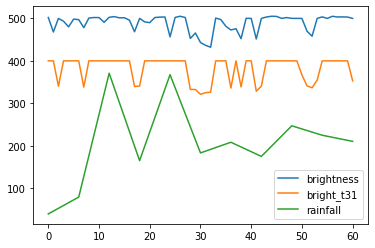

In [190]:
plt.plot(rvM6.brightness, label='brightness')
plt.plot(rvM6.bright_t31, label='bright_t31')
plt.plot(np.linspace(0,60,len(yy)),yy.values, label='rainfall')
plt.legend()

as we can see the the peaks from firebrightness and rainfall maxium are both near to each other and the minimum rainfall was in 2010 and brightness minimums are between 2010 and 2011

Model Random Forest Regressor to see if the Data follows a predictable path for M6 Archive

In [151]:
pm6 = m6[m6.Year > 2018]

In [152]:
categorical_columns = ['State']
pm6['State'] = pm6['State'].astype('category')

D:\PythonData\Anacondas\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [153]:
pm6 = pd.get_dummies(pm6, drop_first=True)

In [154]:
X = np.array(pm6.drop(['confidence','acq_date'], axis=1))
y = np.array(pm6.confidence >80)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [157]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [158]:
y_pred = regr.predict(X_test)

In [159]:
print(classification_report(y_test, y_pred.astype(int)))

              precision    recall  f1-score   support

       False       0.62      1.00      0.77     58120
        True       0.99      0.21      0.35     44340

    accuracy                           0.66    102460
   macro avg       0.81      0.61      0.56    102460
weighted avg       0.78      0.66      0.59    102460



Random Forest Regresser is able to predict a confidence of over 80% with 66% accuracy.

## Question 9: searching fireclusters regarding geocoordinates in example week 73 ##

In [162]:
#dateseparating:
weekm6, monthm6, yearm6 = date_separating(m6, 'W M Y')

In [170]:
# mathode k-means-clustering
from sklearn.cluster import KMeans

wnum1=72
wnum2=73

Xmodis = np.array(weekm6[wnum1][['latitude','longitude']])
Ymodis = np.array(weekm6[wnum2][['latitude','longitude']])

kmeans = KMeans().fit(Xmodis)     
kp = kmeans.predict(Ymodis)
kmeans.cluster_centers_

array([[-26.52172333, 124.59181333],
       [-27.38304324, 149.34331081],
       [-33.58321613, 117.37793871],
       [-17.03870946, 131.43492838],
       [-19.03063529, 139.72273235],
       [-40.44045385, 145.9205    ],
       [-19.15064   , 123.70993   ],
       [-23.07335088, 131.20038421]])

kmean plot:

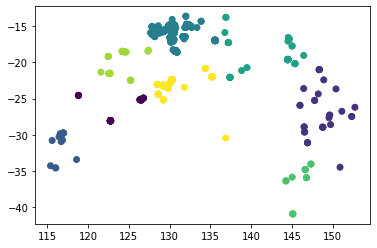

In [171]:
plt.figure()
plt.scatter(weekm6[wnum2].longitude, weekm6[wnum2].latitude, c=kp)

For instance in week 73 of Modis archive data we found a severe fire cluster. We will see this also in the map below.

## Question 10: Mapping features with folium Library ##

In [179]:
#acq_date to dateime
weather = datetime(weather)

In [180]:
#dateseparating weather data:
week, month, year = date_separating(weather, 'W M Y')

In [186]:
### mapping fires from m6 Archive and Rainfall from Weather Data, click the circles to get rain amount.
fm6d = folium.Figure(width=1000, height=500)
wnum=73
m6num=73
center_lat = -24.003249 
center_long = 133.737310
mm6d = folium.Map(location=[center_lat,center_long], control_scale=True, zoom_start=4,width=750, height=500,zoom_control=True).add_to(fm6d)
for i in range(0,weekm6[m6num].shape[0]):    
    location=[weekm6[m6num].iloc[i]['latitude'], weekm6[m6num].iloc[i]['longitude']]
    folium.CircleMarker(location,radius=1,color='red').add_to(mm6d)
for i in range(0,week[wnum].shape[0]):    
    location=[week[wnum].iloc[i]['latitude'], week[wnum].iloc[i]['longitude']]
    folium.CircleMarker(location, radius=8, color="#869ba3", popup=week[wnum].iloc[i]['Rainfall'], fill=True,).add_to(mm6d)
    
folium.TileLayer('stamenterrain').add_to(mm6d)
folium.TileLayer('Stamen Toner').add_to(mm6d)
add = '/MapServer/tile/{z}/{y}/{x}'
ESRI = dict(World_Ocean_Base='http://services.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Base',
            World_Navigation_Charts='http://services.arcgisonline.com/ArcGIS/rest/services/Specialty/World_Navigation_Charts',
            World_Ocean_Reference='http://services.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Reference',
            NatGeo_World_Map='http://services.arcgisonline.com/arcgis/rest/services/NatGeo_World_Map/MapServer',
            World_Imagery='http://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer',
            World_Physical_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Physical_Map/MapServer',
            World_Shaded_Relief='http://services.arcgisonline.com/arcgis/rest/services/World_Shaded_Relief/MapServer',
            World_Street_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Street_Map/MapServer',
            World_Terrain_Base='http://services.arcgisonline.com/arcgis/rest/services/World_Terrain_Base/MapServer',
            World_Topo_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Topo_Map/MapServer')

for tile_name, tile_url in ESRI.items():
    tile_url += add
    folium.TileLayer(tile_url, attr=tile_url, name=tile_name).add_to(mm6d)
    #m.add_tile_layer(tile_name=tile_name,
    #                 tile_url=tile_url)

#m.add_layers_to_map()
folium.LayerControl().add_to(mm6d)

display(mm6d)

Red dots are fires, blue circles are rainfall locations at the same date in week 71 or what ever week is chosen via the variables "wnum" for weather
and "m6num" for firedata. If you click on the cirlcles you can see the rainamount messures at the location.
The Layersymbol lets you chose between base-maplayers.
When we switch weeks we can see that fires often cause severe weather activities and we can also map fires, rainfall and other features over selectet time intervals.